## 군집화(Clustering)
- 원래 피처(X) 개수가 몇개든지 상관없이 우리가 정한 값(k개)만큼 군집을 만들어줌.
- 군집을 만드는 기준은 군집화 알고리즘에 따라 다름.

### 1. k-means Clustering
- "군집 기준: 중심점=군집의 평균"
- 가장 기본적인 군집화 알고리즘
- 알고리즘이 아주 쉽고 간결하며, 거리 계산을 기반으로 각 중심점들과 개별 데이터 간의 거리를 계산함.
- 처음에는 임의로(or 초기화 알고리즘으로) k개만큼의 중심점을 선택, 중심점은 그 중심점으로부터 가장 가까운 거리에 있는 데이터들을 모아 군집을 형성하고, 지속적으로 중심점은 그 데이터의 평균으로 변경됨.->여기서 중심점이 변경되면 다시 거리를 또 계산하여 군집을 바꾸고 중심점도 평균으로 바꾸고,...이런 식.

#### k-means를 이용한 iris 데이터 세트 군집화
- X피처 4개->군집 3개

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#iris의 X피처에 대해서만 df생성(데이터 핸들링을 위해)
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.shape)
iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#k-means(k=3)
#객체
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
#학습
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [9]:
#학습결과 반환(label 출력)
print(kmeans.labels_) #kmeans를 한 후에, 원본 데이터 150개가 어떤 군집에 속해있는지?(여기서는 군집이 3개니까 0,1,2중 하나에 속함)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [21]:
#학습결과- 각 클러스터별, 피처별 중심점 좌표
kmeans.cluster_centers_ #row: cluster(3개) / col:X feature(4개)

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [10]:
#위의 학습결과를 iris_df에 추가
iris_df['cluster']=kmeans.labels_
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [14]:
#실제값과 클러스터링 결과가 많이 같은지?를 확인하여 클러스터링이 잘 되었는지 확인
iris_df['target']=iris.target #실제값

#target, cluster로 그룹바이
iris_df.groupby(['target','cluster']).count() #결과를 보면 클러스터1은 잘 됐는데 0과 2는 살짝 아쉽.

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target cluster                                                           
0      1                       50                50                 50   
1      0                       48                48                 48   
       2                        2                 2                  2   
2      0                       14                14                 14   
       2                       36                36                 36   

                petal width (cm)  
target cluster                    
0      1                      50  
1      0                      48  
       2                       2  
2      0                      14  
       2                      36

In [15]:
#시각화

#1)PCA를 이용해 X 피처 4개->2개의 주성분 축소(시각화를 하려면 딱 x,y축 2개만 있어야 하므로)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris.data)

iris_df['pca_x'] = iris_pca[:,0]
iris_df['pca_y'] = iris_pca[:,1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


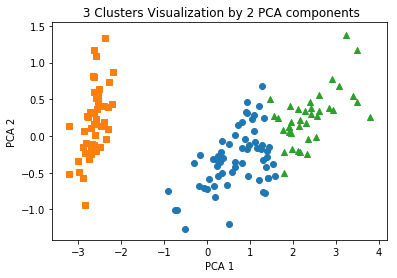

In [18]:
#2)x,y축은 각각 pca_x, pca_y를 대입. 그리고 데이터의 marker 표시는 cluster로 하면 제대로 군집화가 되었는지 알아볼 수 있음

#cluster값이 0,1,2인 경우 별도의 인덱스로 추출-->이따 pca_x, pca_y를 뽑을 때 이 행 번호(인덱스)에 위치한 것만 추출
marker0_ind = iris_df[iris_df['cluster']==0].index
marker1_ind = iris_df[iris_df['cluster']==1].index
marker2_ind = iris_df[iris_df['cluster']==2].index

plt.scatter(iris_df.loc[marker0_ind, 'pca_x'], iris_df.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(iris_df.loc[marker1_ind, 'pca_x'], iris_df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(iris_df.loc[marker2_ind, 'pca_x'], iris_df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(' 3 Clusters Visualization by 2 PCA components')

plt.show()

#### make_blobs()를 이용한 k-means군집화 알고리즘 테스트 : 분류
- make_blobs(n_samples, n_features, centers, clsuter_std, random_state)

In [23]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) #200개의 X,y데이터가 있는 중심점 k=3개
                                                                                                                                            #피처2개이므로 X의 피처는 2개, y(타겟)의 클러스터는 3개(k=3)
print(X.shape, y.shape)

(200, 2) (200,)


In [24]:
#y값 분포 확인
unique, counts = np.unique(y, return_counts=True) #np.unique()는 유니크한 값만 뽑아줌
print(unique, counts) #y 레이블의 유니크 값은 0,1,2고 counts는 그것들 각각의 개수

[0 1 2] [67 67 66]


In [27]:
#df 변환
df = pd.DataFrame(X, columns=['ftr1','ftr2'])
df['target']=y
df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


- X 피처와 target 간 시각화

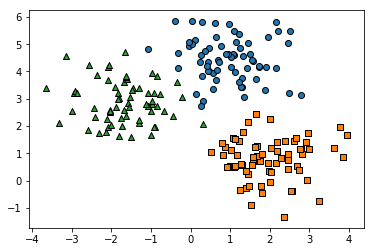

In [33]:
#시각화
target_list = np.unique(y) #0,1,2
markers=['o','s','^']

for t in target_list:
    target_cluster = df[df['target']==t] #t에 따른 cluster 집합 만듦(불린인덱싱이므로 그 행번호의 df반환)
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], marker= markers[t], edgecolor='k') #edgecolor는 테두리의 색을 의미(k는 black)
    
plt.show()

In [31]:
#k-means를 적용하여 위의 시각화 그래프와 비교(y(target) vs k-means cluster값)
#객체
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
#학습 및 예측
cluster_labels = kmeans.fit_predict(X)
df['kmeans_label'] = cluster_labels

In [32]:
df.head()

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


- X 피처와 cluster 결과(kmeans_label) 간 시각화

In [34]:
centers = kmeans.cluster_centers_ #중심점의 좌표 지정->시각화 그래프를 만든 후 중심점에 점을 찍기 위함.
centers #row: cluster / col: X ftr(X1, X2)-->그래프의 x축, y축

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [46]:
print(centers[0]) #cluster 0
print(centers[0][0]) #cluster 0의 X1
print(centers[0,0])

[0.990103   4.44666506]
0.9901029999151206
0.9901029999151206


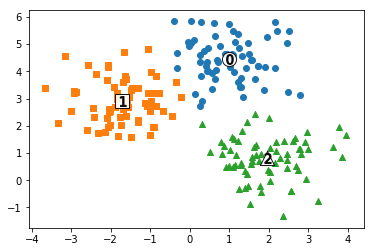

In [45]:
#시각화(kmeans.cluster_centers_ 이용)
centers = kmeans.cluster_centers_ #중심점의 좌표 지정->시각화 그래프를 만든 후 중심점에 점을 찍기 위함.
unique_labels = np.unique(cluster_labels) #0,1,2
markers=['o','s','^']

for i in unique_labels:
    #시각화 그래프(좀전의 코드와 동일)
    label_cluster = df[df['kmeans_label']==i] #i에 따른 cluster 집합 만듦(불린인덱싱이므로 그 행번호의 df반환)
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], marker= markers[i])
    
    #중심점 점 찍기
    center_x_y = centers[i] #클러스터 0,1,2를 지정
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, c='white', alpha=0.9, edgecolor='k', marker=markers[i]) #도형모양의 흰색 점
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=100, c='k', alpha=0.9, edgecolor='k', marker='$%d$' % i) #점 안에 써질 label
    # 이렇게 해도 결과 동일
   # plt.scatter(x=centers[i,0], y=centers[i,1], s=200, c='white', alpha=0.9, edgecolor='k', marker=markers[i])
   # plt.scatter(x=centers[i,0], y=centers[i,1], s=100, c='k', alpha=0.9, edgecolor='k', marker='$%d$' % i)
    
plt.show()


In [51]:
df.groupby(by=['target','kmeans_label']).count() #잘못 분류된 게 1개씩 있을 정도로 잘 매핑됨.

ftr1  ftr2
target kmeans_label            
0      0               66    66
       1                1     1
1      2               67    67
2      1               65    65
       2                1     1

- make_blobs() 의 std(표준편차)에 따라 달라지는 시각화: std이 작으면 더 군집이 모여있고, std이 크면 군집이 퍼져있음(겹치는 것도 존재)
- 시각화는 X 피처 2개, marker는 target에 따라 다르게

In [62]:
#std을 0.4 간격으로 데이터 3개 생성
X1,y1 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.4, random_state=0)
X2,y2 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
X3,y3 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.2, random_state=0)
X4,y4 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=0)
#df 변환
df1 = pd.DataFrame(X1, columns=['ftr1','ftr2'])
df1['target']=y1
df2 = pd.DataFrame(X2, columns=['ftr1','ftr2'])
df2['target']=y2
df3 = pd.DataFrame(X3, columns=['ftr1','ftr2'])
df3['target']=y3
df4 = pd.DataFrame(X3, columns=['ftr1','ftr2'])
df4['target']=y4

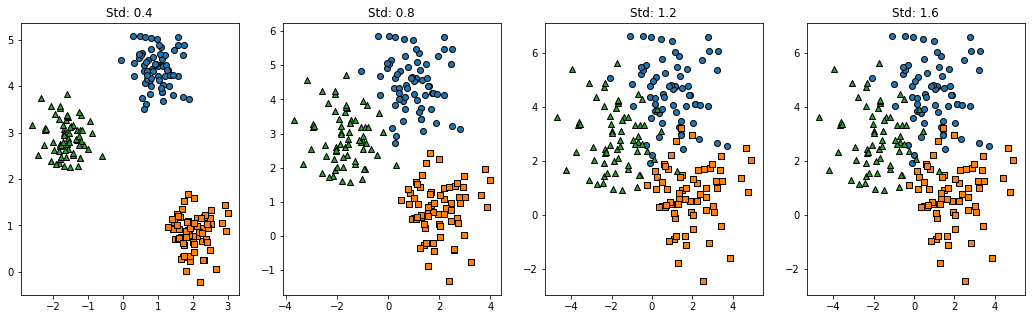

In [63]:
#시각화
target_list = np.unique(y1) #0,1,2
markers=['o','s','^']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,5))

for t in target_list:
    target_cluster1 = df1[df1['target']==t] #t에 따른 cluster 집합 만듦(불린인덱싱이므로 그 행번호의 df반환)
    target_cluster2 = df2[df2['target']==t]
    target_cluster3 = df3[df3['target']==t]
    target_cluster4 = df4[df4['target']==t]
    ax1.scatter(x=target_cluster1['ftr1'], y=target_cluster1['ftr2'], marker= markers[t], edgecolor='k') #edgecolor는 테두리의 색을 의미(k는 black)
    ax2.scatter(x=target_cluster2['ftr1'], y=target_cluster2['ftr2'], marker= markers[t], edgecolor='k') 
    ax3.scatter(x=target_cluster3['ftr1'], y=target_cluster3['ftr2'], marker= markers[t], edgecolor='k') 
    ax4.scatter(x=target_cluster4['ftr1'], y=target_cluster4['ftr2'], marker= markers[t], edgecolor='k') 
    
    ax1.set_title('Std: 0.4')
    ax2.set_title('Std: 0.8')
    ax3.set_title('Std: 1.2')
    ax4.set_title('Std: 1.6')
    
plt.show()

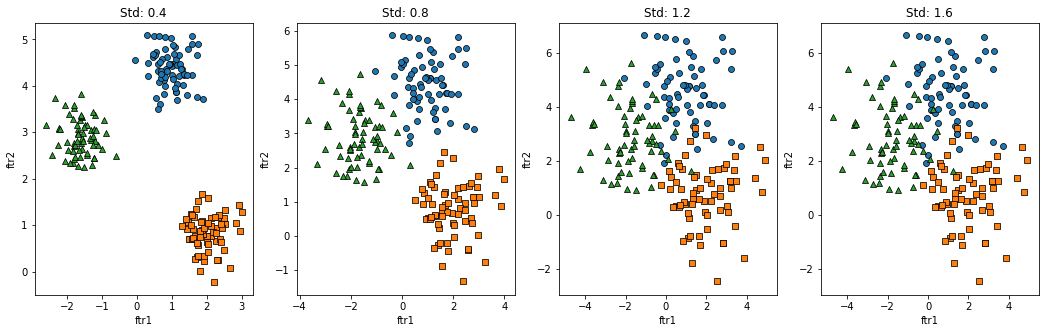

In [75]:
#시각화(한 코드로 for loop 자동화)
import seaborn as sns
target_list = np.unique(y1) #0,1,2
markers=['o','s','^']
fig, axs = plt.subplots(1,4, figsize=(18,5))
df_list = [df1, df2, df3, df4]
std_list = [0.4, 0.8, 1.2, 1.6]

#자동화 원리: df 순서에 맞춰, target이 0,1,2인것을 넣고 다시 다음 df로 이동해서 0,1,2를 넣는 식.==>자동화의 핵심은 ax와 인덱스!! 이것만 있으면 됨.
                                                                                                                                                        ##몇번 축(ax)에 넣을건지 ind로 넣기.
for ind, df in enumerate(df_list):
    for t in target_list:
        target_cluster = df[df['target']==t]
        axs[ind].set_title('Std: '+str(std_list[ind])) #제목에도 자동화 가능
        sns.scatterplot(x=target_cluster['ftr1'], y=target_cluster['ftr2'], marker=markers[t], edgecolor='k', ax = axs[ind]) #축에 axs 넣는게 핵심!
                                                                                                                                         #(주의) plt에는 axs 기능이 없으므로 plot을 sns로 변환해서 사용
plt.show()


### 2. 군집 평가(Silhouette analysis; 실루엣 평가) -> k 선택!
- "k-means의 군집화가 잘 되었는지를 평가하는 평가지표".
- 해당 군집 내 데이터들 간의 거리(=a(i)), 해당 군집에서 가장 가까운 타 군집의 데이터들 간의 거리(=b(i))를 측정. 
- a(i)가 작을수록, b(i)가 클수록 좋음.
- 즉, s(i)가 클수록(1에 가까울수록) 좋다. s(i)는 개별 데이터 각각에 대해 구할 수 있고 나중에 구한 s(i)들을 모두 평균내어 평가한다.

- 이 실루엣 평가는 k-means의 k를 정할 때 사용하기 좋다.(실루엣 계수가 높은 k 선택!)

In [2]:
#iris 데이터 세트를 이용한 군집 평가
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score #실루엣 계수 값 출력
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#k-means 수행
#객체, 학습
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)
iris_df['cluster']=kmeans.labels_
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


##### silhouette_samples(X,labels, metric='euclidean') / silhouette_score(X,labels)
- 각 데이터 포인트의 실루엣 계수를 계산 / 각 데이터 포인트의 실루엣 계수의 평균
- (주의!) 전체 평균 실루엣 계수가 높으면 좋지만, 그렇다고 각 클러스터별 평균 실루엣 계수의 편차가 심하면 좋은 군집화가 아님!
- 클러스터별 편차가 심하다면 전체 평균 실루엣 계수가 낮더라도 편차가 적은 k를 선택하는 게 좋음

In [4]:
#iris의 모든 개별 데이터의 실루엣 계수 값-s(1),s(2),s(3),...
score_samples = silhouette_samples(iris.data, iris_df['cluster']) #개별 데이터의 실루엣 계수
print(score_samples.shape)
iris_df['sil_coeff']=score_samples
iris_df.head()

(150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,sil_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [6]:
#iris의 모든 개별 데이터의 "평균" 실루엣 계수 값 -아까 구한 것의 평균
avg_score = silhouette_score(iris.data, iris_df['cluster'])
np.round(avg_score,3)

0.553

In [8]:
#cluster별 실루엣 계수의 평균은?
iris_df.groupby(by='cluster')['sil_coeff'].mean() #1번 군집은 실루엣 계수가 높은데 나머지가 그에비해 낮아서 전체 실루엣 계수 평균이 0.553으로 나옴.

cluster
0    0.417320
1    0.798140
2    0.451105
Name: sil_coeff, dtype: float64

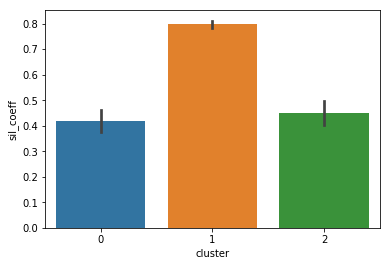

In [15]:
import seaborn as sns
sns.barplot(x=iris_df['cluster'],y=iris_df['sil_coeff'])

- 사이킷런 홈페이지에 수록된) 실루엣 계수를 활용해 k를 변화시킬 때마다 실루엣 계수의 변화 시각화

In [16]:
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

In [17]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

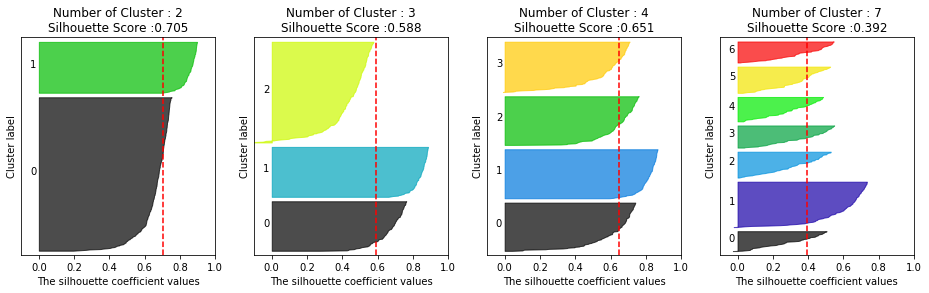

In [21]:
#X 피처를 만들어 위의 함수를 적용해보자.
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0,10.0), shuffle=True, random_state=1)

visualize_silhouette([2,3,4,7], X) #이 데이터는 k=4가 가장 적절.

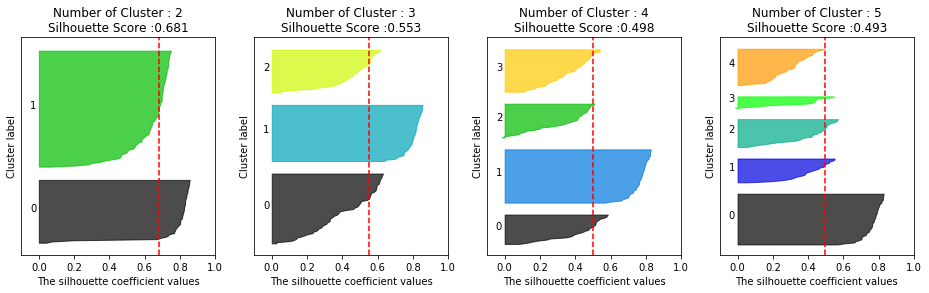

In [23]:
#iris 데이터에 위의 함수를 적용하여 최적의 군집 개수(k)를 선택해보자.
visualize_silhouette([2,3,4,5], iris.data) #이 데이터는 k=2가 가장 적절.(3의 경우 실루엣 계수도 작고, 클러스터별 실루엣계수 편차가 심하기 때문)

- 위의 'visualize_silhouette'함수를 참고하면 클러스터 개수(k개)를 지정한 만큼 클러스터링 결과를 시각화하여 보여주기 때문에 k의 개수를 정하는 데 도움을 준다.
- 밑의 코드는 위의 시각화와 함께 전체 데이터(X 피처 2개)를 2차원상에 점으로 표시해 보여주기까지 하는 코드.(참고만)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


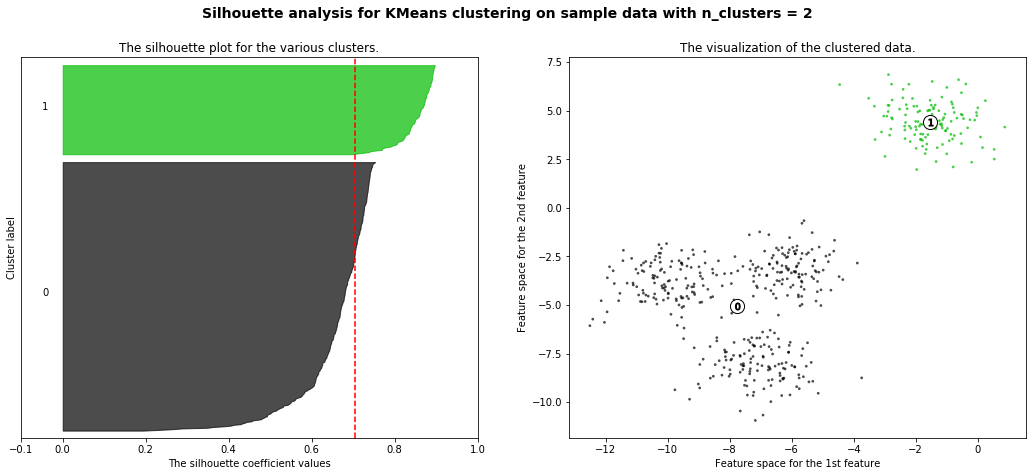

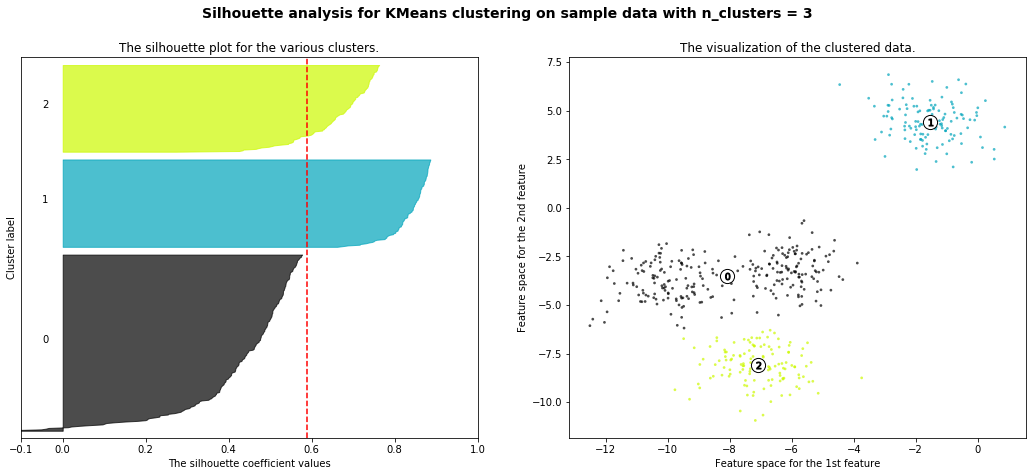

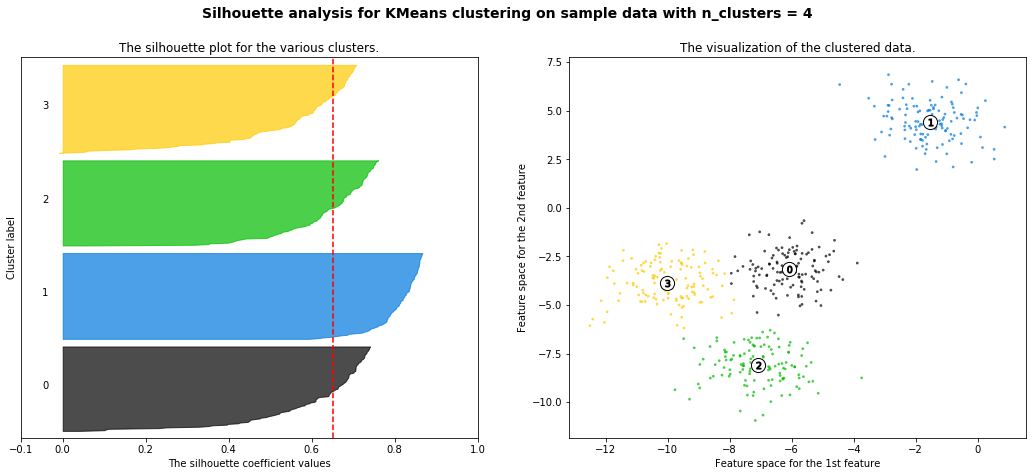

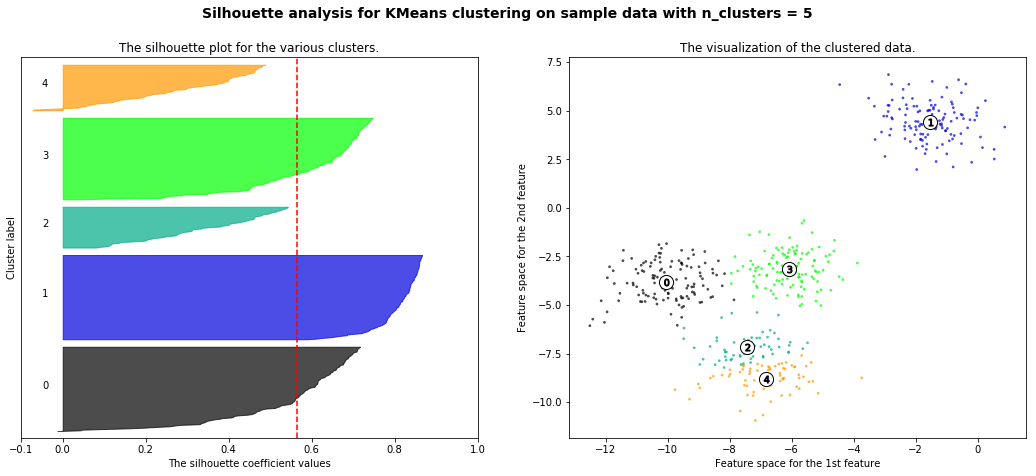

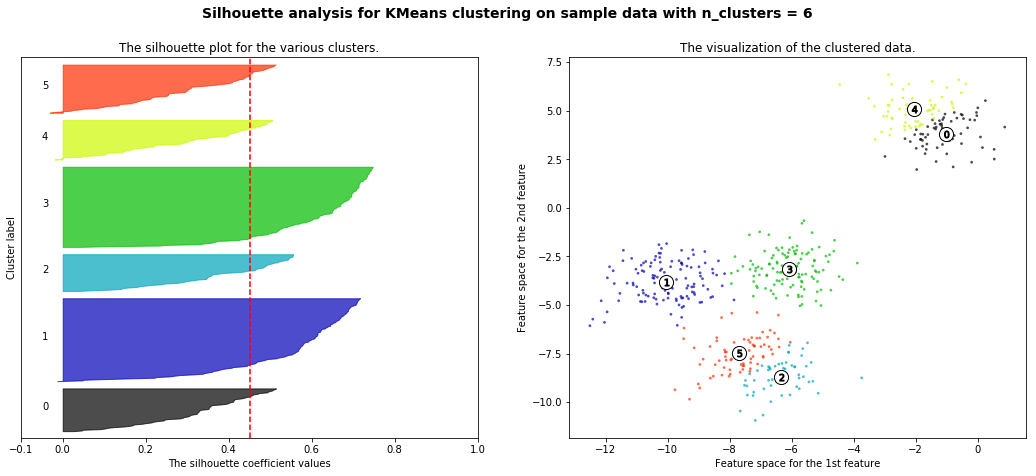

In [24]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()